In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
TOP_RANK = 10

### import 2014

In [4]:
# df = pd.read_excel("H-1B_FY14_Q4.xlsx")
# pickle_out = open("2014.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

### import  2015 

In [5]:
# df = pd.read_excel("H-1B_Disclosure_Data_FY15_Q4.xlsx")
# pickle_out = open("2015.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

### import  2016

In [6]:
# df = pd.read_excel("H-1B_Disclosure_Data_FY16.xlsx")
# pickle_out = open("2016.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [68]:
pickle_in = open("2014.pickle", "rb")
df_2014 = pickle.load(pickle_in)
pickle_in = open("2015.pickle", "rb")
df_2015 = pickle.load(pickle_in)
pickle_in = open("2016.pickle", "rb")
df_2016 = pickle.load(pickle_in)

print("2014 ",list(df_2014),"\n")
print("2015 ",list(df_2015),"\n")
print("2016 ",list(df_2016),"\n")

df_2014 = check_remove_dupli(df_2014)
df_2015 = check_remove_dupli(df_2015)
df_2016 = check_remove_dupli(df_2016)

col_notNaN = ['CASE_NUMBER', 'STATUS', 'CASE_SUBMIT', 'DECISION_DATE', 
              'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME']
df_2014,col_2014 = remove_nan(df_2014,col_notNaN)
df_2015,col_2015 = remove_nan(df_2015,col_notNaN)
df_2016,col_2016 = remove_nan(df_2016,col_notNaN)

df_list = [df_2014,df_2015,df_2016]

2014  ['LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_SUBMIT', 'DECISION_DATE', 'VISA_CLASS', 'LCA_CASE_EMPLOYMENT_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_ADDRESS', 'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_JOB_TITLE', 'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO', 'LCA_CASE_WAGE_RATE_UNIT', 'FULL_TIME_POS', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_CITY', 'LCA_CASE_WORKLOC1_STATE', 'PW_1', 'PW_UNIT_1', 'PW_SOURCE_1', 'OTHER_WAGE_SOURCE_1', 'YR_SOURCE_PUB_1', 'LCA_CASE_WORKLOC2_CITY', 'LCA_CASE_WORKLOC2_STATE', 'PW_2', 'PW_UNIT_2', 'PW_SOURCE_2', 'OTHER_WAGE_SOURCE_2', 'YR_SOURCE_PUB_2', 'LCA_CASE_NAICS_CODE'] 

2015  ['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTA

### The list (column names)below could match from 2014-2016 with differnet naming rules . The remove rules is based on the list which we think there should be no NaN value in these columns. If there is NaN , remove the whole row ( invalid)

### find if there is duplicated and only keep the first appear

In [69]:
def rank_bar(item_counts,top_ranking=TOP_RANK):
    """
    item_counts: dict , items : items occurrence time 
    if there is no setting on TOP_RANK, default = 10
    """
#     print(item_counts.iloc[:top_ranking])
    bar_plot = sns.barplot(x=item_counts.iloc[:top_ranking].index,y=item_counts.iloc[:top_ranking])
    loc, xticklabels = plt.xticks()
    bar_plot.set_xticklabels(xticklabels, rotation=90)
    plt.show()
    
    
def col_bar(df,head):
    temp = [ i for i in list(df) if re.search(head,i)]
    if temp:       
        head = temp[0]
        df_col = df[head]
        item_counts = df[head].value_counts()
        rank_bar(item_counts)
        
def check_remove_dupli(df):
    print(df.shape)
    print(df.duplicated().value_counts().index)
    df = df[~df.duplicated(keep='first')] 
    print(df.shape)
    return df



def remove_nan(df,important_list):
    id_stat = [head for head in list(df) for item in important_list if item in head ]
#     print(df.shape)
    print(df[id_stat].isnull().sum())
    df = df.dropna(subset=id_stat)
    print("after dropna")
#     print(df.shape)
    print(df[id_stat].isnull().sum())
    return df,id_stat

year_list = ['2014','2015','2016']

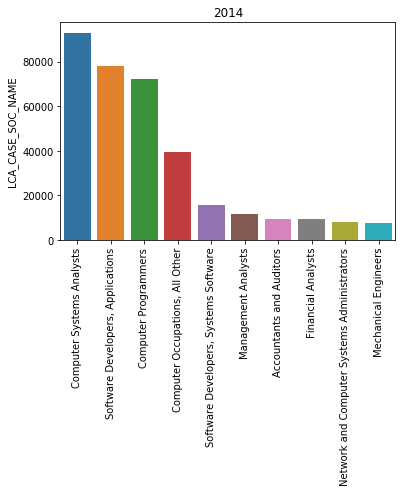

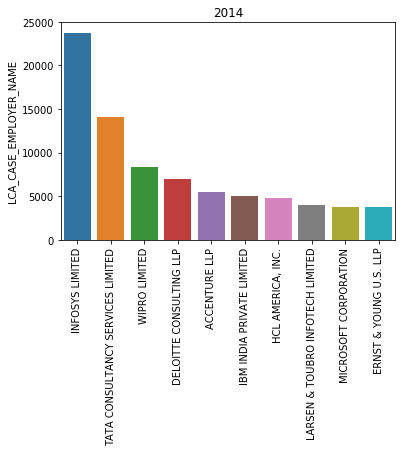

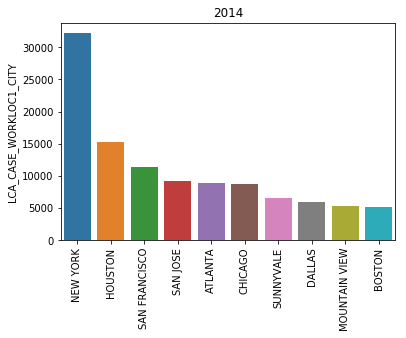

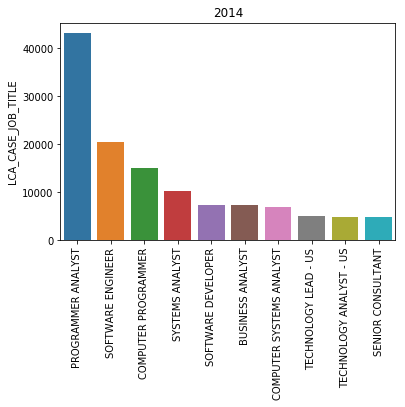

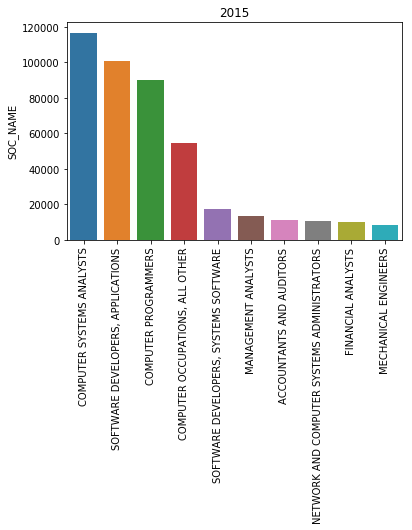

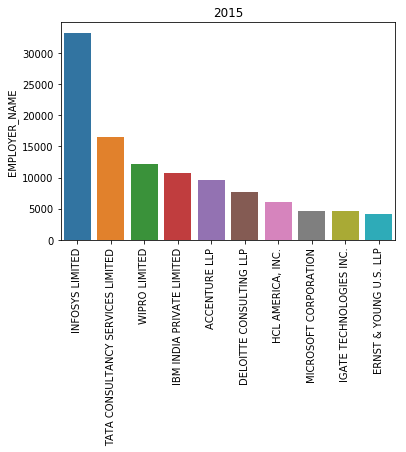

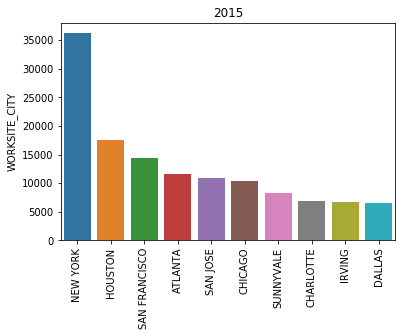

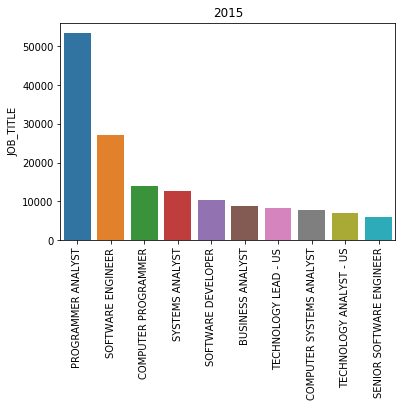

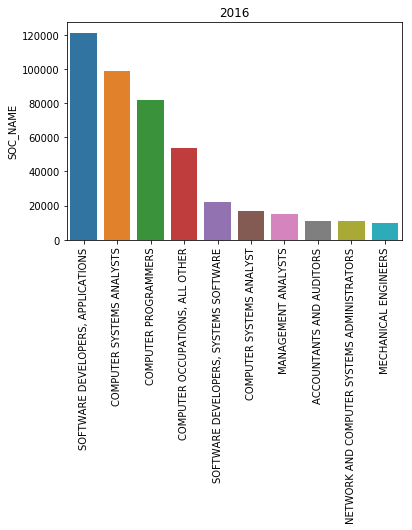

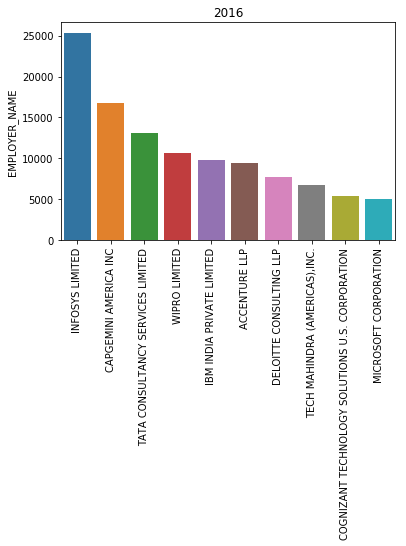

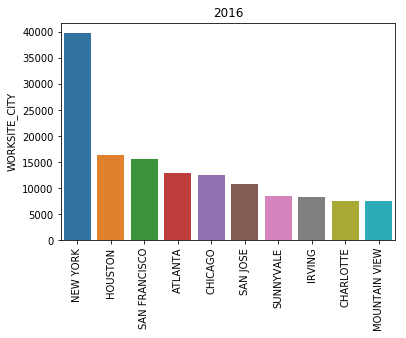

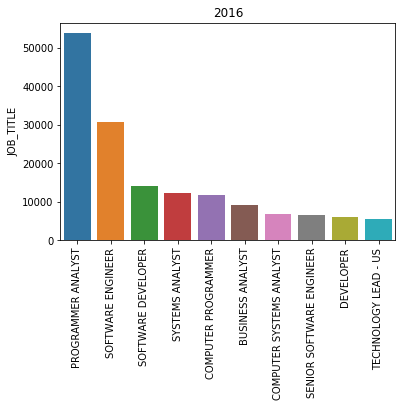

In [70]:
field_list = ['SOC_NAME','EMPLOYER_NAME','WORK.*CITY','JOB_TITLE']
i = 0
for df in df_list:
    year = year_list[i]
    i +=1
    for head in field_list:
        plt.title(year)
        col_bar(df,head)
        

Since the DECISION_DATE should be only current year 
previous year data should be removed

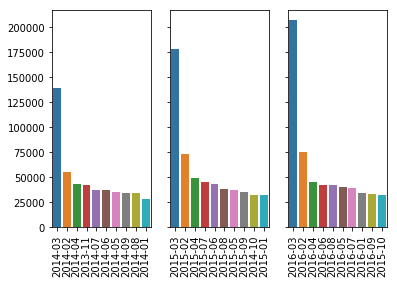

In [30]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    # '%Y-%m-%d'
    df['decision_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in  df[head].values]
    item_counts=df['decision_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

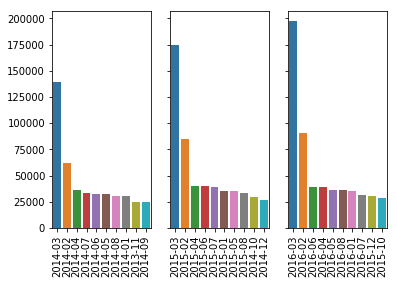

In [31]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    df['submit_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in df[head].values]
    item_counts=df['submit_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

take_time = [(datetime.datetime.strptime(j, "%Y-%m-%d").date()-datetime.datetime.strptime(i, "%Y-%m-%d").date()).days for i, j in zip(submit_date,decision_day)]
df['time_cost'] = take_time
item_counts=df['time_cost'].value_counts()
rank_bar(item_counts)
df['time_cost'].describe()

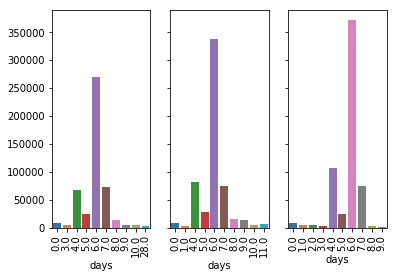

In [104]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    begin = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    end = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    df['time_cost'] = np.around(((df[end]-df[begin]).astype('timedelta64[D]')))
    item_counts=df['time_cost'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel('days')

plt.show()

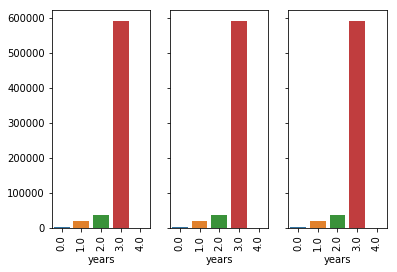

In [103]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_2016
    begin = [ i for i in list(df) if re.search("EMPLOYMENT_START_DATE",i)][0]
    end = [ i for i in list(df) if re.search("EMPLOYMENT_END_DATE",i)][0]
    df['contract_period'] = np.around(((df[end]-df[begin]).astype('timedelta64[D]'))/365)
    item_counts=df['contract_period'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel('years')
plt.show()

In [ ]:
for df in df_list:    
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    df[head].value_counts().iloc[:10]